<a href="https://colab.research.google.com/github/LyubovZadiranova/Neural_Networks_and_CV_stepik/blob/master/%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8_%D0%B4%D0%BB%D1%8F_%D0%BD%D0%B0%D0%B1%D0%BE%D1%80%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_CIFAR_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

На прошлом шаге мы пробовали конволюционную сеть на датасете MNIST, Дело в том, что даже классические методы на этом датасете показывают довольно хорошие результаты (в районе 98 -- 99%). Давайте возьмем действительно сложный датасет, с которым классические методы не справляются. Есть такой датасет: CIFAR-10, он состоит из картинок 32 на 32, это RGB-картинки, всего картинок у них 60 тысяч -- 50 тысяч в трейне и 10 тысяч в валидации. Есть ещё и его увеличенная версия -- CIFAR-100, там 100 классов, но мы, для простоты, возьмём CIFAR-10. Обучим на нём наши сети, которые были в предыдущем шаге. Наш код практически не изменится. Мы должны немного изменить загрузку датасета, потому что теперь у нас три канала в изображении. А во-вторых у нас изменится сеть, потому что раньше нам приходили изображения 28 на 28, теперь 32 на 32. Давайте загрузим этот датасет и посмотрим на него. Загрузить этот датасет, точно так же, как MNIST, мы можем с помощью библиотеки torchvision. Cформируем CIFAR_train и CIFAR_test, Нам нужно преобразовать эти датасеты в FloatTensor, если мы говорим о картинках, и в LongTensor, если мы говорим о классах. Видим, что, действительно, разбивка совпадает с заявленной: 50 000 идёт в train, 10 000 идёт в test. Если мы посмотрим на максимальное и минимальное значения в картинках, то окажется, что минимальное значение -- "0", а максимальное -- "255". Действительно, у них каждый пиксель кодируется значениями от 0 до 255 для каждого канала. С такими изображениями можно работать -- есть сети, которые действительно работают с такими данными. Но мы, для удобства, отнормируем эти данные -- разделим каждый пиксель, каждое его значение, на 255 и получим, что в наших картинках будут лежать значения от нуля до единицы. Давайте так и сделаем, разделим на 255. Кроме того, мы можем посмотреть на классы (действительно, 10 классов), и визуализировать. Действительно видим -- картинки картинки 32 на 32, тут изображены 10 классов, метки -- сверху. Например, метка 9 отвечает за "truck", то есть за грузовики, то есть у нас разметка правильная. Ещё одна особенность этого датасета: как и у обычных картинок, канал "цвет" кодируется в последней размерности. То есть, сначала идёт высота картинки, ширина, а после этого уже цвет. Но pytorch требует, чтобы этот канал шёл на первом месте. То есть, мы имеем сейчас 4-мерный тензор: "количество картинок, высота, ширина и цвет", а Pytorch хочет: "количество картинок, количество цветов, ширина, высота". И теперь нам нужно реорганизовать размерность нашего тензора таким образом, чтобы цвет шёл на втором месте -- как раз после количества картинок в датасете. Это делается с помощью метода "permute". Вот здесь у нас permute с четырьмя аргументами. Первый аргумент "0" отвечает за количество картинок в нашем датасете. Мы не хотим, чтобы "количество картинок" в датасете поменяло позицию, соответственно тут стоит ноль. Далее стоит число "3" -- это значит, что на это место придёт размерность, которая была под номером "3" в изначальном тензоре, то есть это будет "количество каналов". Далее идёт "1", то есть на это место придёт "высота картинки", а дальше "2" -- это значит -- на это место придёт "ширина картинки", и у нас, после выполнения этой операции, у всего датасета будет shape: 50 000 на 3 на 32 на 32. то есть "каналы" будут идти перед размерностью изображения. Далее -- мы изменим нашу сеть LeNet таким образом, чтобы она принимала изображения 32 на 32 и три канала на входе. Чтобы передать ей три канала, нужно в in_chanels первой же конволюции поставить "3" (раньше у нас тут было "1"). А вот размерность 32 на 32 у нас получается из паддинга. Как вы помните, в оригинальном LeNet была размерность 32 на 32 и там были нулевые паддинги, то есть конволюции не выходили за изображение. Мы специально, в LeNet, для MNIST это изменяли, чтобы у нас первая конволюция выходила за изображение и после первой конволюции получается разрешение 28 на 28. А теперь мы, наоборот, хотим чтобы паддинга не было, и из размерности 32 на 32 получалась размерность 28 на 28. Соответственно, мы поставим паддинг "0". Больше ничего не меняется -- процесс обучения не изменяется, он остался таким же, как и раньше.

In [1]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [2]:
import torchvision.datasets

In [3]:
CIFAR_train = torchvision.datasets.CIFAR10('./', download=True, train=True)
CIFAR_test = torchvision.datasets.CIFAR10('./', download=True, train=False)

Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


In [4]:
X_train = torch.FloatTensor(CIFAR_train.data)
y_train = torch.LongTensor(CIFAR_train.targets)
X_test = torch.FloatTensor(CIFAR_test.data)
y_test = torch.LongTensor(CIFAR_test.targets)

In [5]:
len(y_train), len(y_test)

(50000, 10000)

In [6]:
X_train.min(), X_train.max()

(tensor(0.), tensor(255.))

In [7]:
X_train /= 255.
X_test /= 255.

In [8]:
CIFAR_train.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']


tensor(6) tensor(9) tensor(9) tensor(4) tensor(1) tensor(1) tensor(2) tensor(7) tensor(8) tensor(3) 

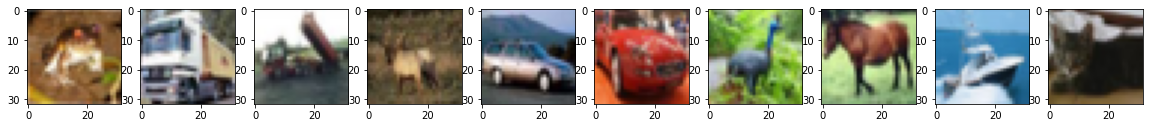

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i])
    print(y_train[i], end=' ')

In [10]:
X_train.shape, y_train.shape

(torch.Size([50000, 32, 32, 3]), torch.Size([50000]))

In [11]:
X_train = X_train.permute(0, 3, 1, 2)
X_test = X_test.permute(0, 3, 1, 2)

In [12]:
X_train.shape

torch.Size([50000, 3, 32, 32])

In [13]:
class LeNet5(torch.nn.Module):
    def __init__(self,
                 activation='tanh',
                 pooling='avg',
                 conv_size=5, 
                 use_batch_norm=False):
        super(LeNet5, self).__init__()
        
        self.conv_size = conv_size
        self.use_batch_norm = use_batch_norm
        
        if activation == 'tanh':
            activation_function = torch.nn.Tanh()
        elif activation == 'relu':
            activation_function  = torch.nn.ReLU()
        else:
            raise NotImplementedError
            
        if pooling == 'avg':
            pooling_layer = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        elif pooling == 'max':
            pooling_layer  = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        else:
            raise NotImplementedError
        
        if conv_size == 5:
            self.conv1 = torch.nn.Conv2d(
                in_channels=3, out_channels=6, kernel_size=5, padding=0)
        elif conv_size == 3:
            self.conv1_1 = torch.nn.Conv2d(
                in_channels=3, out_channels=6, kernel_size=3, padding=0)
            self.conv1_2 = torch.nn.Conv2d(
                in_channels=6, out_channels=6, kernel_size=3, padding=0)
        else:
            raise NotImplementedError

        self.act1 = activation_function
        self.bn1 = torch.nn.BatchNorm2d(num_features=6)
        self.pool1 = pooling_layer
       
        if conv_size == 5:
            self.conv2 = self.conv2 = torch.nn.Conv2d(
                in_channels=6, out_channels=16, kernel_size=5, padding=0)
        elif conv_size == 3:
            self.conv2_1 = torch.nn.Conv2d(
                in_channels=6, out_channels=16, kernel_size=3, padding=0)
            self.conv2_2 = torch.nn.Conv2d(
                in_channels=16, out_channels=16, kernel_size=3, padding=0)
        else:
            raise NotImplementedError

        self.act2 = activation_function
        self.bn2 = torch.nn.BatchNorm2d(num_features=16)
        self.pool2 = pooling_layer
        
        self.fc1 = torch.nn.Linear(5 * 5 * 16, 120)
        self.act3 = activation_function
    
        self.fc2 = torch.nn.Linear(120, 84)
        self.act4 = activation_function
        
        self.fc3 = torch.nn.Linear(84, 10)
    
    def forward(self, x):
        if self.conv_size == 5:
            x = self.conv1(x)
        elif self.conv_size == 3:
            x = self.conv1_2(self.conv1_1(x))
        x = self.act1(x)
        if self.use_batch_norm:
            x = self.bn1(x)
        x = self.pool1(x)
        
        if self.conv_size == 5:
            x = self.conv2(x)
        elif self.conv_size == 3:
            x = self.conv2_2(self.conv2_1(x))
        x = self.act2(x)
        if self.use_batch_norm:
            x = self.bn2(x)
        x = self.pool2(x)
        
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))
        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)
        
        return x

In [14]:
def train(net, X_train, y_train, X_test, y_test):
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    net = net.to(device)
    loss = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=1.0e-3)
    
    batch_size = 100

    test_accuracy_history = []
    test_loss_history = []

    X_test = X_test.to(device)
    y_test = y_test.to(device)

    for epoch in range(30):
        order = np.random.permutation(len(X_train))
        for start_index in range(0, len(X_train), batch_size):
            optimizer.zero_grad()
            net.train()

            batch_indexes = order[start_index:start_index+batch_size]

            X_batch = X_train[batch_indexes].to(device)
            y_batch = y_train[batch_indexes].to(device)

            preds = net.forward(X_batch)

            loss_value = loss(preds, y_batch)
            loss_value.backward()

            optimizer.step()
            
            X_batch

        net.eval()
        with torch.no_grad():
          test_preds = net.forward(X_test)
          test_loss_history.append(loss(test_preds, y_test).data.cpu())

          accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
          test_accuracy_history.append(accuracy)

          print(accuracy)
    del net
    return test_accuracy_history, test_loss_history

accuracies = {}
losses = {}

accuracies['tanh'], losses['tanh'] = \
    train(LeNet5(activation='tanh', conv_size=5),
          X_train, y_train, X_test, y_test)
accuracies['relu'], losses['relu'] = train(LeNet5(activation='relu', conv_size=5),
          X_train, y_train, X_test, y_test)
accuracies['relu_3'], losses['relu_3'] = \
    train(LeNet5(activation='relu', conv_size=3),
          X_train, y_train, X_test, y_test)
accuracies['relu_3_max_pool'], losses['relu_3_max_pool'] = \
    train(LeNet5(activation='relu', conv_size=3, pooling='max'), 
          X_train, y_train, X_test, y_test)
accuracies['relu_3_max_pool_bn'], losses['relu_3_max_pool_bn'] = \
    train(LeNet5(activation='relu', conv_size=3, pooling='max', use_batch_norm=True), 
          X_train, y_train, X_test, y_test)

tensor(0.3876)
tensor(0.4334)
tensor(0.4709)
tensor(0.4962)
tensor(0.4969)
tensor(0.5182)
tensor(0.5263)
tensor(0.5363)
tensor(0.5425)
tensor(0.5401)
tensor(0.5462)
tensor(0.5455)
tensor(0.5432)
tensor(0.5542)
tensor(0.5565)
tensor(0.5588)
tensor(0.5550)
tensor(0.5537)
tensor(0.5534)
tensor(0.5523)
tensor(0.5545)
tensor(0.5500)
tensor(0.5449)
tensor(0.5490)
tensor(0.5471)
tensor(0.5472)
tensor(0.5427)
tensor(0.5429)
tensor(0.5394)
tensor(0.5422)
tensor(0.4321)
tensor(0.4772)
tensor(0.4852)
tensor(0.5230)
tensor(0.5283)
tensor(0.5341)
tensor(0.5611)
tensor(0.5613)
tensor(0.5801)
tensor(0.5827)
tensor(0.5894)
tensor(0.5824)
tensor(0.5982)
tensor(0.6031)
tensor(0.6007)
tensor(0.5995)
tensor(0.6087)
tensor(0.6109)
tensor(0.6129)
tensor(0.6181)
tensor(0.6167)
tensor(0.6190)
tensor(0.6285)
tensor(0.6245)
tensor(0.6267)
tensor(0.6264)
tensor(0.6220)
tensor(0.6279)
tensor(0.6170)
tensor(0.6238)
tensor(0.3744)
tensor(0.4588)
tensor(0.4998)
tensor(0.5190)
tensor(0.5287)
tensor(0.5461)
tensor(0.5

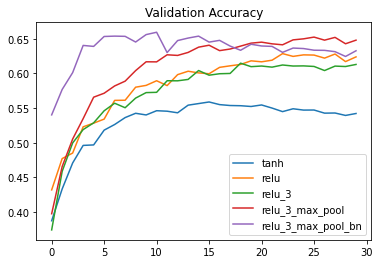

In [15]:
for experiment_id in accuracies.keys():
    plt.plot(accuracies[experiment_id], label=experiment_id)
plt.legend()
plt.title('Validation Accuracy');

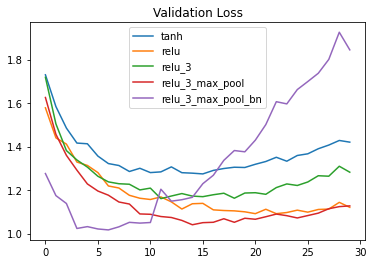

In [16]:
for experiment_id in losses.keys():
    plt.plot(losses[experiment_id], label=experiment_id)
plt.legend()
plt.title('Validation Loss');

Несмотря на то, что получилось неплохо улучшить результат LeNet на датасете CIFAR -- мы улучшили результат на целых 10%, реализация LeNet имела очень большой недостаток. Она хорошо справлялась с цифрами в одноканальном изображении -- цифры были очень простые. А вот на датасете с тремя каналами и с довольно сложными картинками она уже справлялась плохо. Это происходило из-за того, что фильтров в наших свёртках было очень мало. Если вы помните, то первая свёртка имела всего 6 фильтров, а вторая 16. А дальше всё это переходило в полносвязанные слои. Так вот, давайте добавим фильтров и посмотрим -- а если мы из изображения будем извлекать больше информации, может быть, и качество станет лучше. Возьмём все идеи из предыдущего шага и поместим их в одну лаконичную сеть -- назовём её "CIFARNet". Наша сеть будет обладать батч-нормализациями, активации там будут ReLU, мы будем использовать конволюции 3 на 3. В принципе, мы можем использовать конволюции 5 на 5, чтобы узнать, как сделать лучше: я вас призываю попробовать самостоятельно. Кроме того, наши конволюции будут выходить за размер изображения, чтобы этот размер не менялся до и после конволюции. В принципе, зачастую, это хорошая идея, потому что таким образом сеть понимает -- а где границы изображения, в каком месте конволюция находятся в данный момент, находится она в углу изображения, слева или справа. Потому что пиксели, которые выходят за размер изображения заполняются нулями: соответственно, можно обучить такие конволюции, которые будет реагировать на границы изображения и, может быть, это -- дополнительная информация, которая раньше не была доступна. Давайте пройдемся по конкретной реализации. Сперва мы применим батч-нормализацию к исходному изображению -- в принципе, такую батч-нормализацию можно трактовать как нормировку по яркости и контрасту изначального изображения. Дальше мы будем применять свёртки, каждая свёртка будет 3 на 3. Первая свёртка будет иметь 16 каналов (из 3 каналов превращается в 16 каналов). Эта свёртка будет выходить на 1 за размер изображения, из чего следует, что изображение после этой свёртки останется в старом размере. Далее -- активация ReLU, опять батч-нормализация и max pooling. И вот такие вот блоки: конволюция, активация, нормализация и max-pooling будут у нас повторяться. Второй блок отличается от первого только тем, что на вход приходят к нему 16 каналов а на выходе -- 32. Соответственно, каждый следующий блок будет увеличивать в два раза количество каналов. Третий блок: 32 канала на вход, 64 на выход. После третьей свёртки, точно так же, как мы делали в LeNet, у нас будет три полносвязанных слоя. Первый полносвязанный слой примет растянутый вектор изображения размером 8 на 8 на 64. Это число -- 4096: 8 на 8 обусловлено размером тензора, который пришёл после последней свёртки, а 64 -- это её количество каналов. Этот большой тензор он ужмёт в вектор размером 56. Далее будет активация тангенсом. В принципе, можно было бы оставить ReLU -- это на ваше усмотрение. Далее -- BatchNorm1d, потому что у нас 1D тензор. На вход ему приходит 56, потому что это количество нейронов. И далее, точно так же, один полносвязанный слой ужимает до 64 нейронов, тангенс в качестве активации и BatchNorm1d. И последний -- из 64 нейронов делает 10, которые являют собой ответ. Функция forward повторяет логику нашей инициализации. Мы применяем BatchNorm, который называется "batch_norm0", потому что он применяется к изначальному изображению. Далее: конволюция, активация, батч-норм, пулинг; конволюция, активация, батч-норм, пулинг (второй блок); и снова конволюция, активация, "batch_norm3" -- в принципе, можно было бы тоже сделать пулинг -- на ваше усмотрение, можете попробовать с ним. Далее мы разворачиваем наши тензоры в батч из векторов. Первым идёт batch_size, потом размер вектора, который мы хотим получить. То есть это будет: "x.size" -- это 8: высота изображения; "x.size(2)" -- это тоже 8: это ширина изображения, и "x.size(3)" -- это 64: количество каналов в тензоре, которое приходит из последней свёртки. Далее идёт fully-connected слой, активация, batchnorm; fully-connected слой, активация, batchnorm; и ответы получаются из последнего, третьего fully-connected слоя. Давайте посмотрим, как эта сеть классифицирует изображения.

In [17]:
class CIFARNet(torch.nn.Module):
    def __init__(self):
        super(CIFARNet, self).__init__()
        self.batch_norm0 = torch.nn.BatchNorm2d(3)

        self.conv1 = torch.nn.Conv2d(3, 16, 3, padding=1)
        self.act1  = torch.nn.ReLU()
        self.batch_norm1 = torch.nn.BatchNorm2d(16)
        self.pool1 = torch.nn.MaxPool2d(2, 2)
        
        self.conv2 = torch.nn.Conv2d(16, 32, 3, padding=1)
        self.act2  = torch.nn.ReLU()
        self.batch_norm2 = torch.nn.BatchNorm2d(32)
        self.pool2 = torch.nn.MaxPool2d(2, 2)
        
        self.conv3 = torch.nn.Conv2d(32, 64, 3, padding=1)
        self.act3  = torch.nn.ReLU()
        self.batch_norm3 = torch.nn.BatchNorm2d(64)

        self.fc1   = torch.nn.Linear(8 * 8 * 64, 256)
        self.act4  = torch.nn.Tanh()
        self.batch_norm4 = torch.nn.BatchNorm1d(256)
        
        self.fc2   = torch.nn.Linear(256, 64)
        self.act5  = torch.nn.Tanh()
        self.batch_norm5 = torch.nn.BatchNorm1d(64)
        
        self.fc3   = torch.nn.Linear(64, 10)
    
    def forward(self, x):
        x = self.batch_norm0(x)
        x = self.conv1(x)
        x = self.act1(x)
        x = self.batch_norm1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.act2(x)
        x = self.batch_norm2(x)
        x = self.pool2(x)
        
        x = self.conv3(x)
        x = self.act3(x)
        x = self.batch_norm3(x)
        
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))
        x = self.fc1(x)
        x = self.act4(x)
        x = self.batch_norm4(x)
        x = self.fc2(x)
        x = self.act5(x)
        x = self.batch_norm5(x)
        x = self.fc3(x)
        
        return x

In [18]:
from torchvision.models import resnet18

accuracies['resnet18'], losses['resnet18'] = \
    train(resnet18(), X_train, y_train, X_test, y_test)
accuracies['cifar_net'], losses['cifar_net'] = \
    train(CIFARNet(), X_train, y_train, X_test, y_test)

tensor(0.5179)
tensor(0.6134)
tensor(0.6866)
tensor(0.6883)
tensor(0.6323)
tensor(0.6790)
tensor(0.7325)
tensor(0.7419)
tensor(0.7123)
tensor(0.7475)
tensor(0.7257)
tensor(0.7601)
tensor(0.7474)
tensor(0.7156)
tensor(0.7506)
tensor(0.7438)
tensor(0.7431)
tensor(0.7545)
tensor(0.7585)
tensor(0.7578)
tensor(0.7447)
tensor(0.7410)
tensor(0.7021)
tensor(0.7526)
tensor(0.7637)
tensor(0.7395)
tensor(0.7662)
tensor(0.7462)
tensor(0.7641)
tensor(0.7651)
tensor(0.6604)
tensor(0.6937)
tensor(0.7066)
tensor(0.7086)
tensor(0.7155)
tensor(0.7085)
tensor(0.7142)
tensor(0.7064)
tensor(0.7180)
tensor(0.7155)
tensor(0.7140)
tensor(0.7136)
tensor(0.7115)
tensor(0.7114)
tensor(0.7046)
tensor(0.7123)
tensor(0.7160)
tensor(0.7131)
tensor(0.7143)
tensor(0.7126)
tensor(0.7064)
tensor(0.7072)
tensor(0.7136)
tensor(0.7128)
tensor(0.7077)
tensor(0.7119)
tensor(0.7134)
tensor(0.7179)
tensor(0.7221)
tensor(0.7077)


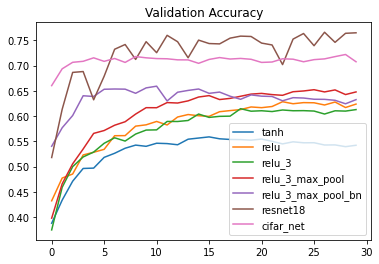

In [19]:
for experiment_id in accuracies.keys():
    plt.plot(accuracies[experiment_id], label=experiment_id)
plt.legend()
plt.title('Validation Accuracy');

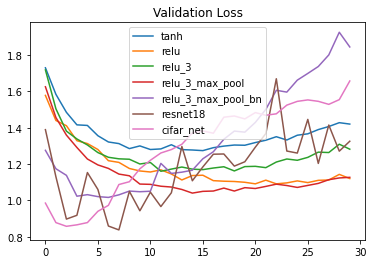

In [20]:
for experiment_id in losses.keys():
    plt.plot(losses[experiment_id], label=experiment_id)
plt.legend()
plt.title('Validation Loss');